# Aim: Assess word frequency changes over time

# Setup

In [1]:
# Libraries including our own ones

from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics.pairwise

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import lib_dataimport
import lib_processing
import importlib
lib_dataimport = importlib.reload(lib_dataimport)
lib_processing = importlib.reload(lib_processing)

In [2]:
# Graphics stuff

def darkmode(foreground="0.85", background="0.15"):
	''' Switch on darkmode. Foreground and background colours may also be specified explicitly. '''
	_set_fgbg(fg=foreground, bg=background)

def lightmode(foreground="0", background="1.0"):
	''' Switch on lightmode. Foreground and background colours may also be specified explicitly. '''
	_set_fgbg(fg=foreground, bg=background)


#############################
# Internal helper functions #
#############################

def _set_fgbg(fg, bg):
	plt.rcParams.update({
		"lines.color": fg,
		"patch.edgecolor": fg,
		"text.color": fg,
		"axes.facecolor": bg,
		"axes.edgecolor": fg,
		"axes.labelcolor": fg,
		"xtick.color": fg,
		"ytick.color": fg,
		"grid.color": fg,
		"figure.facecolor": bg,
		"figure.edgecolor": bg,
		"savefig.facecolor": bg,
		"savefig.edgecolor": bg})
    
darkmode()

In [3]:
# Data import and bag-of-words fitting

df = lib_dataimport.read_data()
assert len(df) == 963

words, word_frequencies = lib_processing.bag_of_words(df)
assert np.shape(word_frequencies)[0] == 963
assert np.shape(word_frequencies)[1] > 100

# Find candidates

In [4]:
# We extract word frequency sum, avg, and stddev; and calculate C.V.
word_stats = pd.DataFrame([words, word_frequencies.sum(axis=0), word_frequencies.mean(axis=0), word_frequencies.std(axis=0)]).T
word_stats.columns = ["word", "sum-freq", "mean-freq", "std-freq"]
word_stats["cv-freq"] = word_stats["std-freq"] / word_stats["mean-freq"]

# Inspect word frequency distribution
# ~51% of words appear only once
frequencies = word_stats["sum-freq"]
for i in range(1, 10):
    print(i, len(frequencies[frequencies == i]), len(frequencies[frequencies == i])/len(frequencies)*100)
    
# We only retain words which have been mentioned at least 50 times and sort by C.V.
word_stats = word_stats.loc[word_stats["sum-freq"] > 50, :]
word_stats = word_stats.sort_values(by="cv-freq", ascending=False)

# Print some potentially interesting words
word_stats.head(50)

1 9381 50.52512522216836
2 2788 15.015888404157915
3 1378 7.4217698066462
4 826 4.4487531642160825
5 580 3.1238218344374427
6 410 2.208218882964399
7 321 1.7288738083696882
8 267 1.4380352237841332
9 222 1.195669736629504


,word,sum-freq,mean-freq,std-freq,cv-freq
15384,trag,69,0.071651,0.527594,7.363374
7720,handlung,52,0.053998,0.385608,7.141169
6254,frankfurt,51,0.05296,0.373442,7.051467
1863,bed,55,0.057113,0.391841,6.860788
3209,charakter,65,0.067497,0.423373,6.272434
10503,meister,62,0.064382,0.384011,5.964559
5902,faust,55,0.057113,0.331551,5.805156
12303,poesie,62,0.064382,0.370244,5.750718
9898,leser,73,0.075805,0.421965,5.566467
6685,gegenst,70,0.07269,0.403659,5.553194


# Plot frequencies

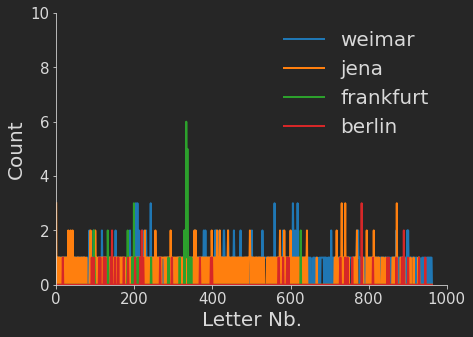

In [6]:
print_words = ["weimar", "jena", "frankfurt", "berlin"]

fig, ax = plt.subplots(1,1,figsize=(7,5))

for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    ax.plot((freq_over_time), lw=2, label=print_word)
    
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Count", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,1000))
ax.set_ylim((0,10))
ax.legend(loc=1, frameon=False, fontsize=20)
plt.savefig("Fig4ugly.svg", bbox_inches="tight")


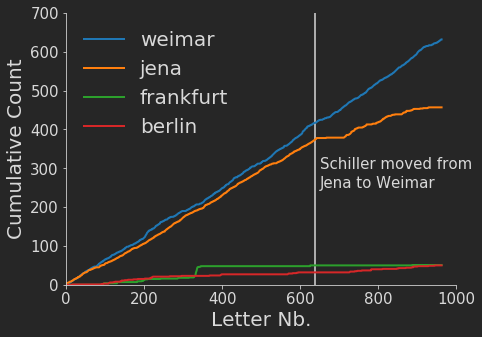

In [84]:
print_words = ["weimar", "jena", "frankfurt", "berlin"]

fig, ax = plt.subplots(1,1,figsize=(7,5))

for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    ax.plot(np.cumsum(freq_over_time), lw=2, label=print_word)
    
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Cumulative Count", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,1000))
ax.set_ylim((0,700))
ax.legend(loc=2, frameon=False, fontsize=20)
ax.vlines([639], 0, 700, color=".85")
ax.text(650, 300, "Schiller moved from", size=15)
ax.text(650, 250, "Jena to Weimar", size=15)
plt.savefig("Fig4.svg", bbox_inches="tight")


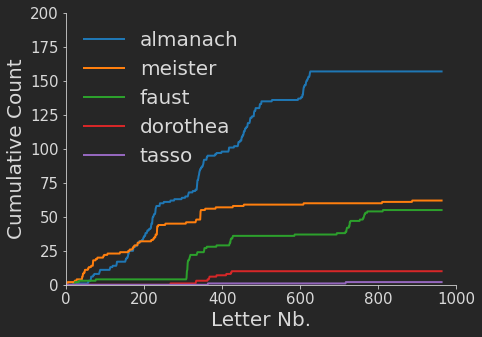

In [7]:
print_words = ["almanach", "meister", "faust", "dorothea", "tasso"]

fig, ax = plt.subplots(1,1,figsize=(7,5))

for print_word in print_words:
    freq_over_time = word_frequencies[:, np.array(words)==print_word]
    ax.plot(np.cumsum(freq_over_time), lw=2, label=print_word)
    
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Cumulative Count", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,1000))
ax.set_ylim((0,200))
ax.legend(loc=2, frameon=False, fontsize=20)
plt.savefig("Fig5.svg", bbox_inches="tight")
